In [53]:
import pandas as pd

csv_path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv'

df = pd.read_csv(csv_path)

In [73]:
problem_smiles = ["FC(F)(F)C1CCNCC1", "NC1(C(F)(F)F)CCC1", "O=C(O)[C@@H]1CC[C@H]1C(F)(F)F", "O=C(O)[C@H]1C[C@H]1C(F)(F)F"]

for smiles in problem_smiles:
    for index, row in df.iterrows():
        if row['Smiles'] == smiles:
            print(index, row)

134 Unnamed: 0                                                  134
Reference                                10.1002/chem.202201601
Smiles                                         FC(F)(F)C1CCNCC1
LogP                                                        2.2
pKa                                                         9.6
Structure                                                   NaN
MW                                                      153.148
Amine or acid                                             Amine
Bemis-Murcko                                                NaN
Framework                                           cyclohexane
F group                                                     CF3
Stereo, F to FG                                             NaN
Linear path(s) F to FG                                      2.0
Length of linear path, bonds                                  0
Unnamed: 13                                                   0
Unnamed: 14                         

In [69]:
from rdkit import Chem

for smiles in problem_smiles:
    
    mol = Chem.MolFromSmiles("FC(F)(F)C1CCNCC1")

    print(mol)

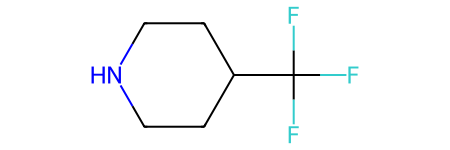

In [70]:
from rdkit import Chem

mol = Chem.MolFromSmiles("FC(F)(F)C1CCNCC1")

mol

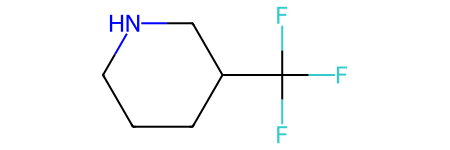

In [71]:
from rdkit import Chem

mol = Chem.MolFromSmiles("FC(F)(F)C1CCCNC1")

mol

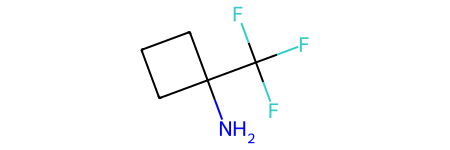

In [72]:
from rdkit import Chem

mol = Chem.MolFromSmiles("NC1(C(F)(F)F)CCC1")

mol

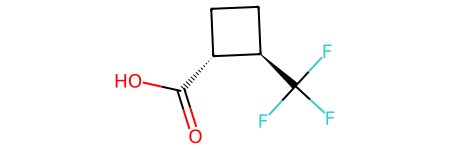

In [59]:
from rdkit import Chem

mol = Chem.MolFromSmiles("O=C(O)[C@@H]1CC[C@H]1C(F)(F)F")

mol

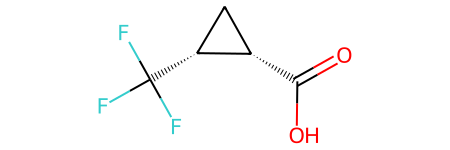

In [60]:
from rdkit import Chem

mol = Chem.MolFromSmiles("O=C(O)[C@H]1C[C@H]1C(F)(F)F")

mol

In [61]:
df_features = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\remained_features_pKa_07.05_v5_canonical_smiles.csv')

In [62]:
PKA_FEATURES = ['RPCS', 'PBF', 'mol_weight', 'dipole_moment', 'PPSA5',
                'avg_atoms_in_cycle', 'nHRing', 'cis/trans', 'FPSA3', 'nF', 'chirality',
                'sasa', 'PNSA5', 'GeomShapeIndex', 'TASA', 'mol_num_cycles',
                'f_freedom', 'nFRing', 'identificator', 'nO', 'nARing', 'nC', 'nFHRing',
                'f_to_fg']

PKA_FEATURES = ['RPCS', 'PBF', 'dipole_moment', 'PPSA5',
                'FPSA3', 'nF', 'chirality',
                'sasa', 'PNSA5', 'GeomShapeIndex', 'TASA', ]

In [74]:
df_features.iloc[[134, 100]][PKA_FEATURES]

,RPCS,PBF,dipole_moment,PPSA5,FPSA3,nF,chirality,sasa,PNSA5,GeomShapeIndex,TASA
134,0.324476,0.637612,0.326013,12.298357,0.027277,3,0,189.033942,-15.008822,0.615841,291.311707
100,0.215547,0.802176,0.365677,12.608326,0.026306,3,0,177.532343,-18.683610,0.644062,267.239946


In [64]:
[11.119999885559082, 9.600000381469727]

[11.119999885559082, 9.600000381469727]

In [65]:
[10.674836158752441, 10.408605575561523]

[10.674836158752441, 10.408605575561523]

In [66]:
csv_models_results = r'C:\work\DrugDiscovery\main_git\XAI_Chem\ml_part\weights\pKa\separate_model_for_each_molecule\separate_models_for_each_molecule.csv'

df_results = pd.read_csv(csv_models_results, index_col=0)

In [75]:
for smiles in problem_smiles:

    for index, row in df_results.iterrows():
        if pd.isnull(row['r^2']):
            continue

        if Chem.CanonSmiles(smiles) in row['model_name']:
            print(row)
    
    print("-" * 20)

model_name                               134_FC(F)(F)C1CCNCC1_C1CCNCC1
loss                                                          0.426007
r^2                                                              0.262
mse                                                              0.426
mae                                                              0.627
true_values                    [11.119999885559082, 9.600000381469727]
pred_values                   [10.674836158752441, 10.408605575561523]
train_r^2                                                        0.991
train_mse                                                        0.054
train_mae                                                         0.19
train_true_values    [4.349999904632568, 4.789999961853027, 4.82999...
train_pred_values    [4.047946929931641, 4.423041343688965, 4.42304...
Name: 148, dtype: object
--------------------
model_name                               100_NC1(C(F)(F)F)CCC1_NC1CCC1
loss                           